In [2]:
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
#Define function for Bat Algorithm optimization
def bat_algorithm(objective_function, n_bats, n_generations, n_variables, lower_bound, upper_bound, alpha, gamma):
    
    #initialize bats with random positions and velocities
    bats = np.random.uniform(lower_bound, upper_bound, (n_bats, n_variables))
    velocities = np.zeros((n_bats, n_variables))
    frequencies = np.zeros(n_bats)
    loudness = np.ones(n_bats)
    pulse_rate = np.ones(n_bats)
    
    # Find the best initial solution
    best_bat = bats[np.argmin([objective_function(bat) for bat in bats])]
    
    #iterate over generations
    for _ in range(n_generations):
        for i, bat in enumerate(bats):
            #update frequency, velocity and position
            frequencies[i] = random.random()
            velocities[i] += (bat - best_bat) * frequencies[i]
            bats[i] += velocities[i]
            
            #Boundary check
            bats[i] = np.clip(bats[i], lower_bound, upper_bound)
            
            #update the bat's position using local search
            if random.random() > pulse_rate[i]:
                bats[i] = best_bat + np.random.uniform(-1, 1) * loudness[i]
                
            #evaluate the new solution
            if random.random() < loudness[i] and objective_function(bats[i]) < objective_function(best_bat):
                best_bat = bats[i]
                loudness[i] *= alpha
                pulse_rate[i] *= 1 - np.exp(-gamma)

    return best_bat

In [4]:
def objective_function(x):
    #Enhance the image with the given parameters
    enhanced_image = enhance_image(original_image, x)
    
    #Evaluate the contrast of the enhanced image
    return -contrast(enhanced_image)

In [5]:
def enhance_image(image, x):
    #apply the given parameters to each channel of the image separately, and stack the results back into a color image
    return np.clip(image * x[0] + x[1], 0, 255).astype(np.uint8)

In [6]:
def contrast(image):
    #calculate the standard deviation of the image as a measure of contrast
    return np.std(image)

In [7]:
image_path = 'noisy-1.png'

#Open the input image as a grayscale image and convert it to a NumPy array
original_image = np.array(Image.open(image_path).convert('L'))

In [12]:
n_bats = 20
n_generations = 300
n_variables = 2
lower_bound = np.array([0.5, -50])
upper_bound = np.array([1.5, 50])
alpha = 0.9
gamma = 0.9

#apply the Bat Algorithm to find the best set of parameters for image enhancement
best_solution = bat_algorithm(objective_function, n_bats, n_generations, n_variables, lower_bound, upper_bound, alpha, gamma)

#enhance the image with the best set of parameters found by the Bat Algorithm
enhanced_image = enhance_image(original_image, best_solution)

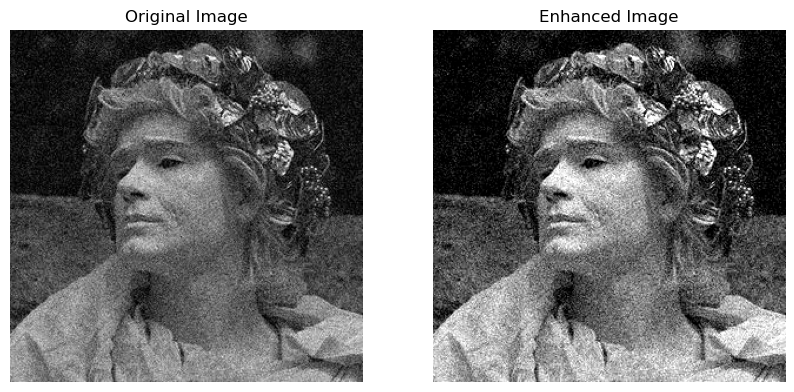

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(enhanced_image, cmap='gray')
axes[1].set_title('Enhanced Image')
axes[1].axis('off')

plt.show()